# Big Data Mart Sales Prediction

Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

# Problem Statement

To find what drives the sales amount for a certain product in different stores and to predict where and how to maximize the sales for this particular product. The task is to predict the sales of a certain product at a particular store, part of a chain of stores and find out what influences that sale. We have access to 2013 collected data, for 1559 products across 10 stores in different cities. We will evaluate the model for the predictive accuracy.

# Data Description

  
Item_Identifier- Unique product ID

Item_Weight- Weight of product

Item_Fat_Content - Whether the product is low fat or not

Item_Visibility - The % of total display area of all products in a store allocated to the particular product

Item_Type - The category to which the product belongs to

Item_MRP - Maximum Retail Price (list price) of the product

Outlet_Identifier - Unique store ID

Outlet_Establishment_Year- The year in which store was established

Outlet_Size - The size of the store in terms of ground area covered

Outlet_Location_Type- The type of city in which the store is located

Outlet_Type- Whether the outlet is just a grocery store or supermarket

Item_Outlet_Sales - Sales of the product in the particular store. This is the output variable to be predicted.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

There are two files in the dataset train and test.

we will analysis both the files simultaneously so that the test files can be used for prediction purpose

In [2]:
train_df= pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_df.shape

(8523, 12)

In [6]:
test_df.shape

(5681, 11)

In [7]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning

# Check For Null Values

In [10]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

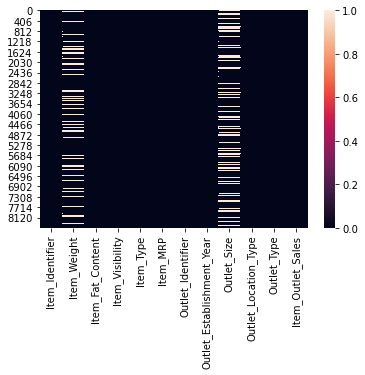

In [11]:
sns.heatmap(train_df.isnull())

In [12]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

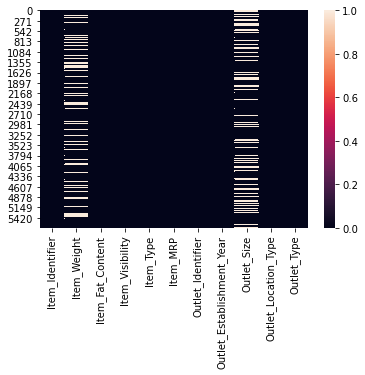

In [13]:
sns.heatmap(test_df.isnull())

The columns Item_Weight and Outlet_size has null values.

Item_Weight: Null values are treated with the mean of the column.
    
Outlet_size: Null values are treated with most occuring value(mode) of the column

Fill Item_Weight: Mean imputation since it is a numerical column

In [14]:
train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(), inplace=True)

In [15]:
test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(), inplace=True)

Fill Outlet_Size: Mode imputation since it is a categorical data.

In [16]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
train_df['Outlet_Size'].value_counts().index[2]

'High'

In [18]:
test_df['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [19]:
test_df['Outlet_Size'].value_counts().index[2]

'High'

Since the column is imbalanced, we are filling the null values with the lowest frequent occurance to balance the column

In [20]:
train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].value_counts().index[2], inplace=True)
test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].value_counts().index[2], inplace=True)

In [21]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Drop Columns

Item_Identifier and Outlet_Identifier are indentification codes for the product. It doesnt have much to do with the sales, so deleting this columns

In [23]:
train_df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [24]:
test_df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [25]:
train_df.shape

(8523, 10)

In [26]:
test_df.shape

(5681, 9)

# Data Analysis

In [27]:
train_df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [28]:
categorical_columns=[x for x in train_df.dtypes.index if train_df.dtypes[x]=='object']
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

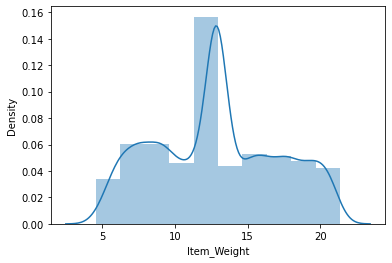

In [29]:
sns.distplot(train_df['Item_Weight'],bins=10)
plt.show()

Item_Weight is distributed between 5 to 20 kgs, but the average weight lies around 12 to 13.

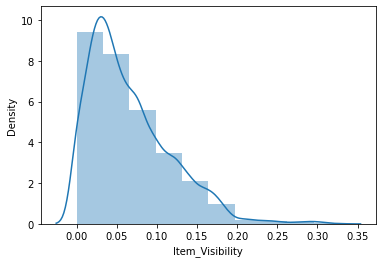

In [30]:
sns.distplot(train_df['Item_Visibility'],bins=10)
plt.show()

There is skewness present in this column. 

This Item_Visibility is distributed more around 0 to 0.05 

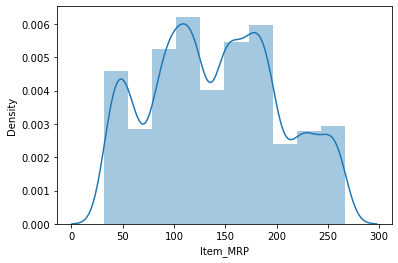

In [31]:
sns.distplot(train_df['Item_MRP'],bins=10)
plt.show()

The items are distributed in different price ranges. Most products fall under the price range of 80 to 120 and 150 to 200 dollars

Target Variable

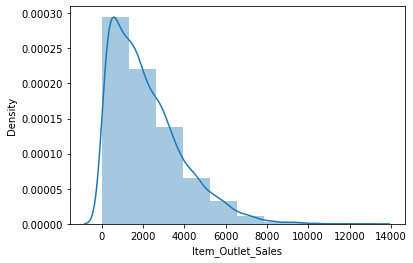

In [32]:
sns.distplot(train_df['Item_Outlet_Sales'],bins=10)
plt.show()

The overall sales is high within the range of 1000 to 2000 dollars.

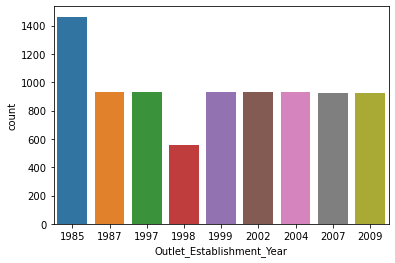

In [33]:
sns.countplot(train_df['Outlet_Establishment_Year'])
plt.show()

This indicates that most of the outlets are established in the year 1985. In 1998, very less number are outlets are being established.

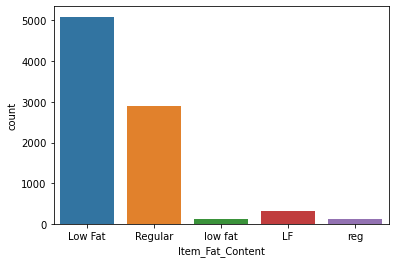

In [34]:
sns.countplot(train_df['Item_Fat_Content'])
plt.show()

This column shows only two classification, but products are distributed in different name. So we will combine them

In [35]:
train_df.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
test_df.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [36]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

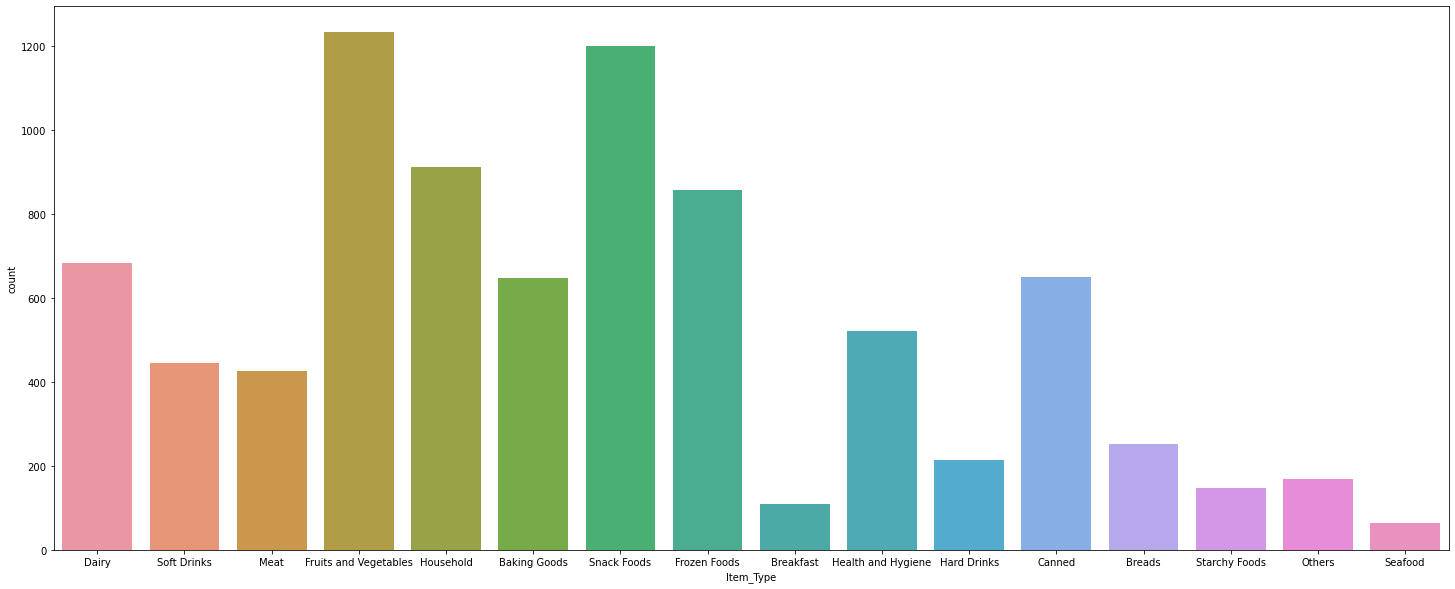

In [37]:
plt.figure(figsize=(25,10))
sns.countplot(train_df['Item_Type'])
plt.show()

This column indicates that there are nearly 16 types of item monitored for sales

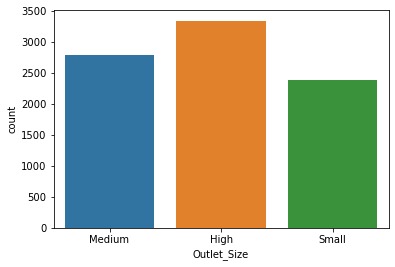

In [38]:
sns.countplot(train_df['Outlet_Size'])
plt.show()

The Outlet size is high and medium for many of the outlets taken into consideration

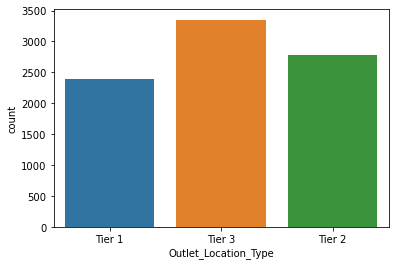

In [39]:
sns.countplot(train_df['Outlet_Location_Type'])
plt.show()

Most of the outlets will fall under Tier3 location category

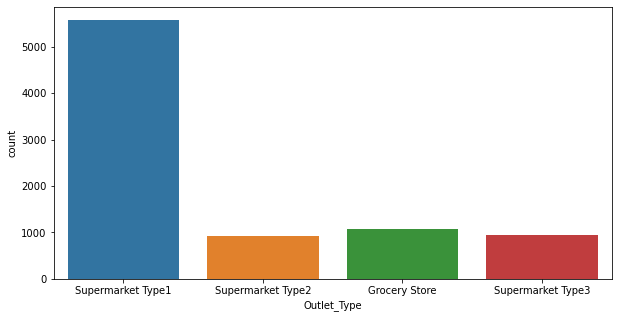

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(train_df['Outlet_Type'])
plt.show()

Most of the outlets comes under Supermarket Type 1, other store are equally categorized to the other types

# Encode The Categorical Columns

In [41]:
LE= LabelEncoder()
train_df['Item_Fat_Content']= LE.fit_transform(train_df['Item_Fat_Content'])
test_df['Item_Fat_Content']= LE.fit_transform(test_df['Item_Fat_Content'])

In [42]:
LE.inverse_transform([1,0])

array(['Regular', 'Low Fat'], dtype=object)

In [43]:
train_df['Item_Type']= LE.fit_transform(train_df['Item_Type'])
test_df['Item_Type']= LE.fit_transform(test_df['Item_Type'])

In [44]:
train_df['Outlet_Size']= LE.fit_transform(train_df['Outlet_Size'])
test_df['Outlet_Size']= LE.fit_transform(test_df['Outlet_Size'])

In [45]:
LE.inverse_transform([2,1,0])

array(['Small', 'Medium', 'High'], dtype=object)

In [46]:
train_df['Outlet_Location_Type']= LE.fit_transform(train_df['Outlet_Location_Type'])
test_df['Outlet_Location_Type']= LE.fit_transform(test_df['Outlet_Location_Type'])

In [47]:
LE.inverse_transform([2,1,0])

array(['Tier 3', 'Tier 2', 'Tier 1'], dtype=object)

In [48]:
train_df['Outlet_Type']= LE.fit_transform(train_df['Outlet_Type'])
test_df['Outlet_Type']= LE.fit_transform(test_df['Outlet_Type'])

In [49]:
LE.inverse_transform([3,2,1,0])

array(['Supermarket Type3', 'Supermarket Type2', 'Supermarket Type1',
       'Grocery Store'], dtype=object)

In [50]:
train_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,0,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,0,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [51]:
test_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2007,0,1,1
2,14.600000,0,0.099575,11,241.7538,1998,0,2,0
3,7.315000,0,0.015388,13,155.0340,2007,0,1,1
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,1,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,0,0.073529,8,118.7440,2002,0,1,1
5679,15.300000,1,0.000000,3,214.6218,2007,0,1,1


In [52]:
train_df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,1997.831867,0.888068,1.112871,1.201220,2181.288914
std,4.226124,0.477836,0.051598,4.209990,62.275067,8.371760,0.812310,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,0.000000,0.000000,1.000000,834.247400
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


The mean is deviated from median in certain columns, which shows the columns may have skewness.

There are large difference between 75th percentile and the maximum values in Item_Type, Item_MRP, so there can be outliers present in the columns which cn be handled with z score

# To Find Correlation

In [53]:
train_df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.008301,0.001182,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.003151,0.000142,-0.001598,0.002199,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.074834,0.023376,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.004970,-0.002565,0.003084,0.003053,0.017048
Item_MRP,0.024756,0.006063,-0.001315,0.032651,1.000000,0.005020,0.008222,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,-0.008301,0.003151,-0.074834,0.004970,0.005020,1.000000,-0.071996,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001182,0.000142,0.023376,-0.002565,0.008222,-0.071996,1.000000,-0.504295,0.039714,0.009478
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.089216,-0.504295,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.173468,0.003053,-0.001975,-0.122304,0.039714,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.018719,-0.128625,0.017048,0.567574,-0.049135,0.009478,0.089367,0.401522,1.000000


<AxesSubplot:>

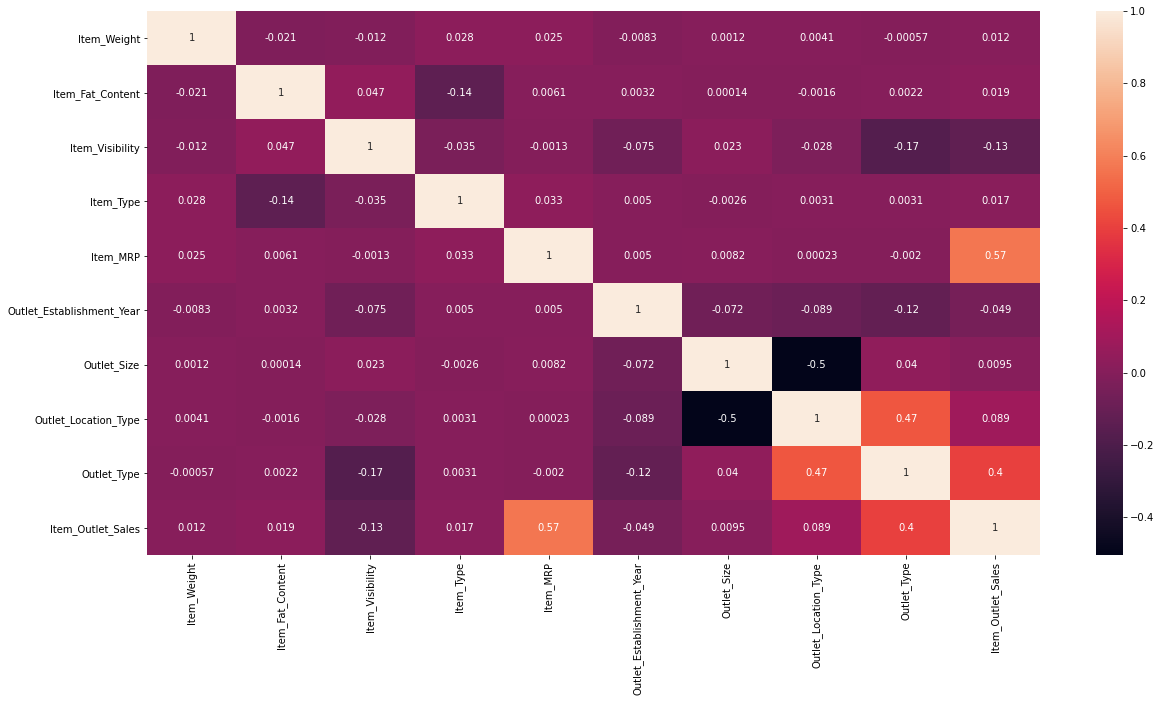

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(),annot=True)

Item_MRP is highly correlated with Sales.

Outlet_Type is also correlated to Sales column.

Outlet_establishment_year has no correlation with the sales.

Outlet_Location_Type and Outlet_Type is correlated to each other. 

we will drop Outlet_establishment_year

In [55]:
train_df.drop(columns='Outlet_Establishment_Year', axis=1, inplace=True)
test_df.drop(columns='Outlet_Establishment_Year', axis=1, inplace=True)

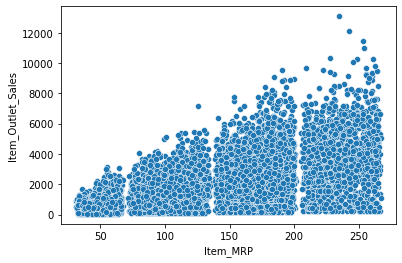

In [56]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_df)
plt.show()

The Sales increases with increase in Item_MRP, which shows they are positively correlated.

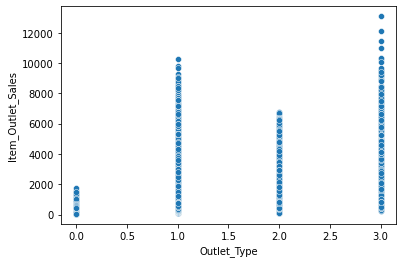

In [57]:
sns.scatterplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_df)
plt.show()

This shows that the sales is high with Supermarket type1 and supermarket type3.

# Check For Collinearity - VIF

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
df1=train_df.iloc[:,0:-1]
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1,0,1
1,5.920,1,0.019278,14,48.2692,1,2,2
2,17.500,0,0.016760,10,141.6180,1,0,1
3,19.200,1,0.000000,6,182.0950,0,2,0
4,8.930,0,0.000000,9,53.8614,0,2,1
...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1
8519,8.380,1,0.046982,0,108.1570,0,1,1
8520,10.600,0,0.035186,8,85.1224,2,1,1
8521,7.210,1,0.145221,13,103.1332,1,2,2


In [60]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']=df1.columns
    return(vif)

In [61]:
vif_fun() 

,vif_factor,features
0,6.882567,Item_Weight
1,1.525409,Item_Fat_Content
2,2.550053,Item_Visibility
3,3.583163,Item_Type
4,5.110747,Item_MRP
5,3.048898,Outlet_Size
6,5.228193,Outlet_Location_Type
7,4.957459,Outlet_Type


Item _WEight and Outlet_Location_Type has collinearity, out of which Item_Weight contributes more to the target variable. So we will drop Outlet_Location_Type

In [137]:
train_df.drop(columns='Outlet_Location_Type', axis=1, inplace=True)
test_df.drop(columns='Outlet_Location_Type', axis=1, inplace=True)

In [139]:

train_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1,1,3735.1380
1,5.920,1,0.019278,14,48.2692,1,2,443.4228
2,17.500,0,0.016760,10,141.6180,1,1,2097.2700
3,19.200,1,0.000000,6,182.0950,0,0,732.3800
4,8.930,0,0.000000,9,53.8614,0,1,994.7052
...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,0,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,1,2,1845.5976


In [140]:
df1=train_df.iloc[:,0:-1]
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1,1
1,5.920,1,0.019278,14,48.2692,1,2
2,17.500,0,0.016760,10,141.6180,1,1
3,19.200,1,0.000000,6,182.0950,0,0
4,8.930,0,0.000000,9,53.8614,0,1
...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,1
8519,8.380,1,0.046982,0,108.1570,0,1
8520,10.600,0,0.035186,8,85.1224,2,1
8521,7.210,1,0.145221,13,103.1332,1,2


In [141]:
vif_fun() 

,vif_factor,features
0,6.535176,Item_Weight
1,1.521745,Item_Fat_Content
2,2.452485,Item_Visibility
3,3.538939,Item_Type
4,5.001934,Item_MRP
5,2.116390,Outlet_Size
6,2.972452,Outlet_Type


In [144]:
df2=test_df

In [145]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']=[variance_inflation_factor(df1.values,i) for i in range(df2.shape[1])]
    vif['features']=df2.columns
    return(vif)

In [146]:
vif_fun() 

,vif_factor,features
0,6.535176,Item_Weight
1,1.521745,Item_Fat_Content
2,2.452485,Item_Visibility
3,3.538939,Item_Type
4,5.001934,Item_MRP
5,2.116390,Outlet_Size
6,2.972452,Outlet_Type


# Check For Skewness

In [147]:
#train Data
df1.skew().sort_values(ascending=False)

Item_Visibility     1.167091
Outlet_Type         0.927438
Item_Fat_Content    0.616705
Outlet_Size         0.207197
Item_MRP            0.127202
Item_Type           0.101655
Item_Weight         0.090561
dtype: float64

In [148]:
#test Data
test_df.skew().sort_values(ascending=False)

Item_Visibility     1.238312
Outlet_Type         0.927446
Item_Fat_Content    0.609223
Outlet_Size         0.206916
Item_Weight         0.142813
Item_MRP            0.136182
Item_Type           0.096486
dtype: float64

There is skewness present in Item_Visibility column. 

Threshold limit is set to be +/-0.5

In [149]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [150]:
from sklearn.preprocessing import power_transform
df2_new= power_transform(test_df)

Scaling of data

In [151]:
#train Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1_new= sc.fit_transform(df1_new)
df1_new

array([[-0.82263635, -0.73814723, -1.14688621, ...,  1.62367023,
         0.31106382, -0.12348771],
       [-1.73380133,  1.35474328, -1.03709991, ..., -1.59501643,
         0.31106382,  1.04059102],
       [ 1.08636176, -0.73814723, -1.12237453, ...,  0.08123678,
         0.31106382, -0.12348771],
       ...,
       [-0.49655592, -0.73814723, -0.54297932, ..., -0.86792986,
         1.25673764, -0.12348771],
       [-1.37344321,  1.35474328,  1.45998957, ..., -0.54899589,
         0.31106382,  1.04059102],
       [ 0.49178563, -0.73814723, -0.27619496, ..., -1.04722682,
         1.25673764, -0.12348771]])

In [152]:
#test data
sc=StandardScaler()
df2_new= sc.fit_transform(df2_new)
df2_new

array([[ 1.77007392, -0.74081066, -1.46206861, ..., -0.47201654,
         0.31073165, -0.12353311],
       [-1.03619283,  1.34987258, -0.44801894, ..., -0.83599752,
        -1.15815005, -0.12353311],
       [ 0.49167513, -0.74081066,  0.87134242, ...,  1.52537499,
        -1.15815005, -1.91575348],
       ...,
       [-0.59355557, -0.74081066,  0.39786781, ..., -0.288074  ,
        -1.15815005, -0.12353311],
       [ 0.64562931,  1.34987258, -1.76023409, ...,  1.15680222,
        -1.15815005, -0.12353311],
       [-0.72091914,  1.34987258,  0.9524881 , ..., -0.97581463,
        -1.15815005, -0.12353311]])

In [153]:
df1=pd.DataFrame(df1_new, columns= df1.columns)
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Type
0,-0.822636,-0.738147,-1.146886,-0.712347,1.623670,0.311064,-0.123488
1,-1.733801,1.354743,-1.037100,1.504660,-1.595016,0.311064,1.040591
2,1.086362,-0.738147,-1.122375,0.684390,0.081237,0.311064,-0.123488
3,1.447728,1.354743,-1.745551,-0.215420,0.689968,-1.157957,-1.915952
4,-0.917588,-0.738147,-1.745551,0.468410,-1.476078,-1.157957,-0.123488
...,...,...,...,...,...,...,...
8518,-1.468096,-0.738147,0.020310,1.305304,1.148258,-1.157957,-0.123488
8519,-1.060659,1.354743,-0.221388,-1.923750,-0.463127,-1.157957,-0.123488
8520,-0.496556,-0.738147,-0.542979,0.246996,-0.867930,1.256738,-0.123488
8521,-1.373443,1.354743,1.459990,1.305304,-0.548996,0.311064,1.040591


In [154]:
df2=pd.DataFrame(df2_new, columns= test_df.columns)
df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Type
0,1.770074,-0.740811,-1.462069,1.301686,-0.472017,0.310732,-0.123533
1,-1.036193,1.349873,-0.448019,-0.712433,-0.835998,-1.158150,-0.123533
2,0.491675,-0.740811,0.871342,0.892240,1.525375,-1.158150,-1.915753
3,-1.306479,-0.740811,-1.175927,1.301686,0.290835,-1.158150,-0.123533
4,0.059211,1.349873,1.153823,-0.712433,1.424528,0.310732,1.922271
...,...,...,...,...,...,...,...
5676,-0.468330,1.349873,-1.243150,1.301686,0.077563,1.256669,-0.123533
5677,-1.227105,1.349873,1.453584,1.696978,0.504137,0.310732,1.040210
5678,-0.593556,-0.740811,0.397868,0.244553,-0.288074,-1.158150,-0.123533
5679,0.645629,1.349873,-1.760234,-0.978099,1.156802,-1.158150,-0.123533


df1----> train data

df2----> test data

In [155]:
df1.skew().sort_values(ascending=False)

Item_Fat_Content    0.616705
Item_Visibility     0.124279
Outlet_Type         0.007863
Outlet_Size        -0.042837
Item_Weight        -0.068024
Item_MRP           -0.115386
Item_Type          -0.164574
dtype: float64

In [156]:
df2.skew().sort_values(ascending=False)

Item_Fat_Content    0.609223
Item_Visibility     0.116776
Outlet_Type         0.007830
Outlet_Size        -0.043003
Item_Weight        -0.060915
Item_MRP           -0.111040
Item_Type          -0.167431
dtype: float64

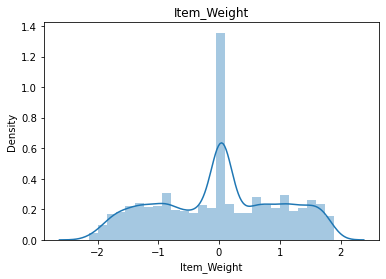

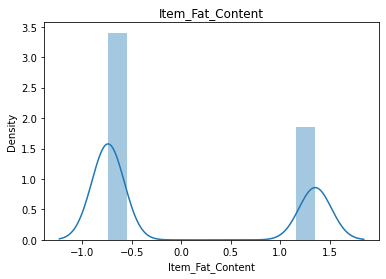

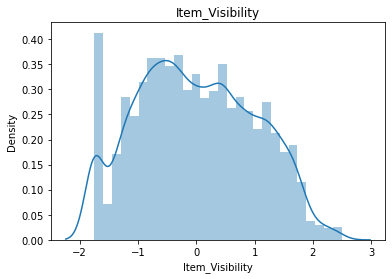

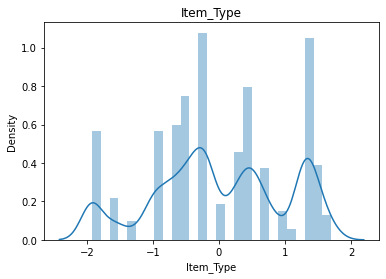

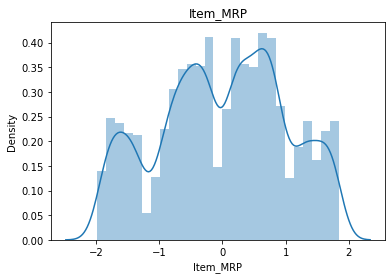

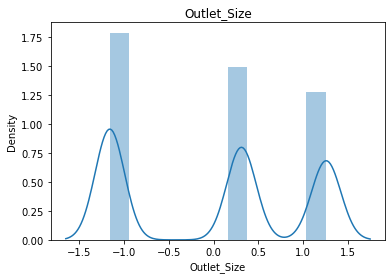

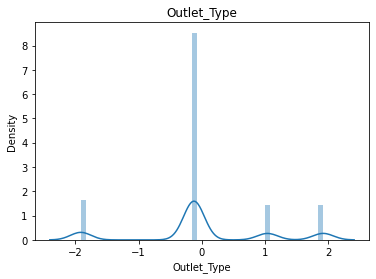

In [157]:
for i in df1.columns:
    sns.distplot(df1[i])
    plt.title(i)
    plt.show()

In [158]:
#add target variable to df1
df1['Item_Outlet_Sales']=train_df['Item_Outlet_Sales']

In [159]:
df1.shape

(8523, 8)

In [160]:
df2.shape  #test

(5681, 7)



The columns cannot be normalized, but the skewness is reduced considerably. There are outliers present in Item_Weight, Item_Visibility and MRP columns

# Checking For Outliers

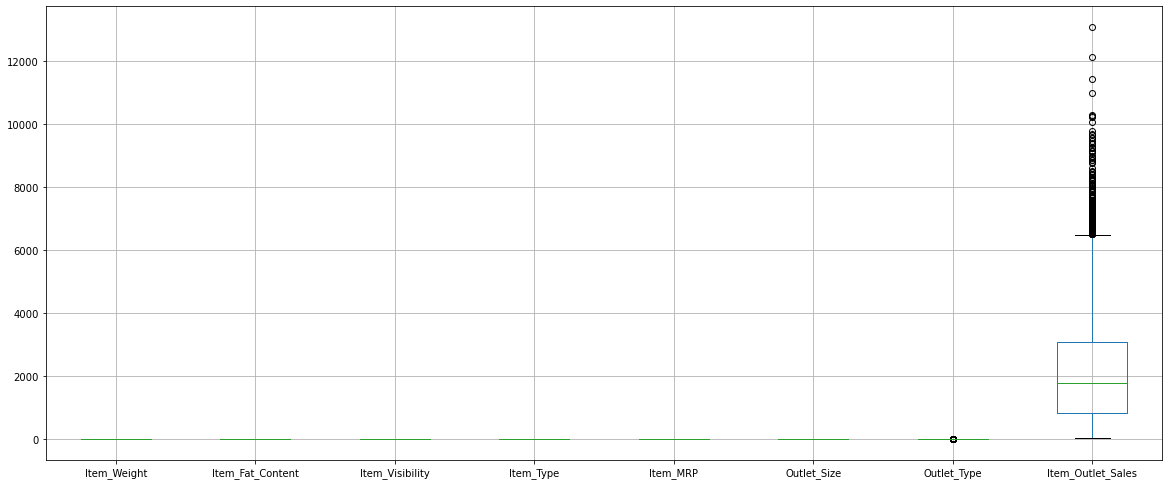

In [161]:
#train data
df1.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

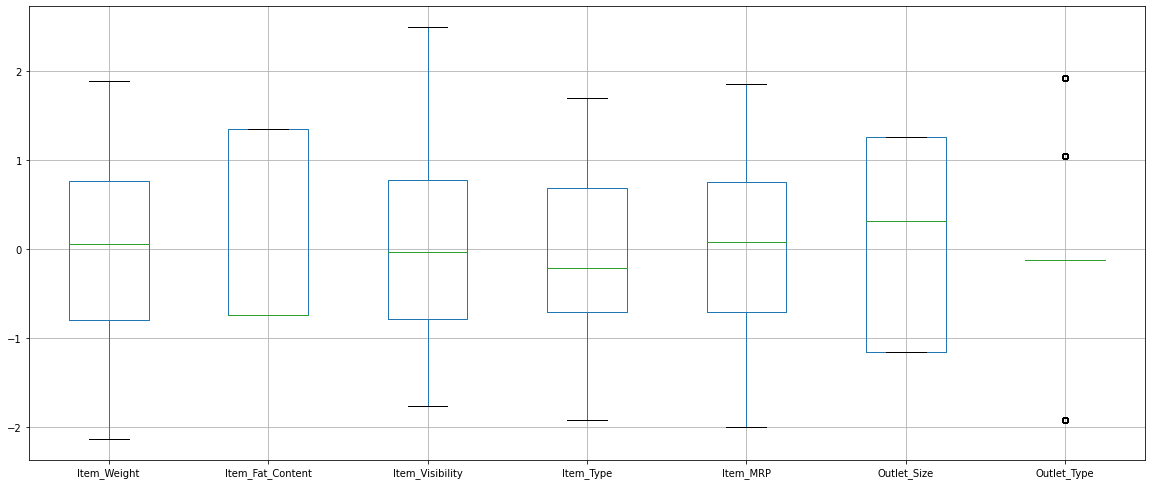

In [162]:
#test data
df2.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

Outliers are present in both the datasets in outlet type and sales columns

In [163]:
from scipy.stats import zscore
z=np.abs(zscore(df1))  #train data
z

array([[0.82263635, 0.73814723, 1.14688621, ..., 0.31106382, 0.12348771,
        0.910601  ],
       [1.73380133, 1.35474328, 1.03709991, ..., 0.31106382, 1.04059102,
        1.01844035],
       [1.08636176, 0.73814723, 1.12237453, ..., 0.31106382, 0.12348771,
        0.04923754],
       ...,
       [0.49655592, 0.73814723, 0.54297932, ..., 1.25673764, 0.12348771,
        0.57909963],
       [1.37344321, 1.35474328, 1.45998957, ..., 0.31106382, 1.04059102,
        0.19672492],
       [0.49178563, 0.73814723, 0.27619496, ..., 1.25673764, 0.12348771,
        0.82959407]])

In [164]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([ 130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
        809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
       2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
       3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
       4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
       5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
       6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
       7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
       8245, 8447], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7], dtype=int64))


In [165]:
df1_new= df1[(z<3).all(axis=1)]
df1_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,-0.822636,-0.738147,-1.146886,-0.712347,1.623670,0.311064,-0.123488,3735.1380
1,-1.733801,1.354743,-1.037100,1.504660,-1.595016,0.311064,1.040591,443.4228
2,1.086362,-0.738147,-1.122375,0.684390,0.081237,0.311064,-0.123488,2097.2700
3,1.447728,1.354743,-1.745551,-0.215420,0.689968,-1.157957,-1.915952,732.3800
4,-0.917588,-0.738147,-1.745551,0.468410,-1.476078,-1.157957,-0.123488,994.7052
...,...,...,...,...,...,...,...,...
8518,-1.468096,-0.738147,0.020310,1.305304,1.148258,-1.157957,-0.123488,2778.3834
8519,-1.060659,1.354743,-0.221388,-1.923750,-0.463127,-1.157957,-0.123488,549.2850
8520,-0.496556,-0.738147,-0.542979,0.246996,-0.867930,1.256738,-0.123488,1193.1136
8521,-1.373443,1.354743,1.459990,1.305304,-0.548996,0.311064,1.040591,1845.5976


In [166]:
df1_new.shape

(8433, 8)

In [167]:
train_df.shape

(8523, 8)

In [168]:
#Perccentase data Lost
loss_percent= (8523-8433)/(8523*100)
loss_percent

0.00010559662090813094

In train data, only very little amount of data is lost, due to outliers present.

In [169]:
z1=np.abs(zscore(df2))  #test data
z1

array([[1.77007392, 0.74081066, 1.46206861, ..., 0.47201654, 0.31073165,
        0.12353311],
       [1.03619283, 1.34987258, 0.44801894, ..., 0.83599752, 1.15815005,
        0.12353311],
       [0.49167513, 0.74081066, 0.87134242, ..., 1.52537499, 1.15815005,
        1.91575348],
       ...,
       [0.59355557, 0.74081066, 0.39786781, ..., 0.288074  , 1.15815005,
        0.12353311],
       [0.64562931, 1.34987258, 1.76023409, ..., 1.15680222, 1.15815005,
        0.12353311],
       [0.72091914, 1.34987258, 0.9524881 , ..., 0.97581463, 1.15815005,
        0.12353311]])

In [170]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z1>3))

(array([], dtype=int64), array([], dtype=int64))


In [171]:
df2_new= df2[(z1<3).all(axis=1)]
df2_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Type
0,1.770074,-0.740811,-1.462069,1.301686,-0.472017,0.310732,-0.123533
1,-1.036193,1.349873,-0.448019,-0.712433,-0.835998,-1.158150,-0.123533
2,0.491675,-0.740811,0.871342,0.892240,1.525375,-1.158150,-1.915753
3,-1.306479,-0.740811,-1.175927,1.301686,0.290835,-1.158150,-0.123533
4,0.059211,1.349873,1.153823,-0.712433,1.424528,0.310732,1.922271
...,...,...,...,...,...,...,...
5676,-0.468330,1.349873,-1.243150,1.301686,0.077563,1.256669,-0.123533
5677,-1.227105,1.349873,1.453584,1.696978,0.504137,0.310732,1.040210
5678,-0.593556,-0.740811,0.397868,0.244553,-0.288074,-1.158150,-0.123533
5679,0.645629,1.349873,-1.760234,-0.978099,1.156802,-1.158150,-0.123533


In [172]:
df2_new.shape

(5681, 7)

In [173]:
test_df.shape

(5681, 7)

In test data no outliers are present 

Very mere data is lost in train dataset, no outliers are present in test data. we will proceed with model building

# Spliting the data and Balancing 

In [269]:
x= df1_new.iloc[:,0:-1]
y=df1_new.iloc[:,-1]

In [270]:
xtest=df2

The target values are continous. So we will use linearRegression 

# Train the Model

In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

# Check the best Random State

# Linear Regression

In [272]:
maxr2=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    predlr= lr.predict(xtest)
    R2=r2_score(ytest,predlr)
    if R2>maxr2:
        maxr2=R2
        maxRS=i
print("Best R2_score is", maxr2, 'on Random_state',maxRS)

Best R2_score is 0.7720099044648068 on Random_state 26


# To Find the Best Cross Validation Score 

In [273]:
pred_tr= lr.predict(xtrain)
pred_ts= lr.predict(xtest)

In [274]:
train_score= r2_score(ytrain,pred_tr)
test_score= r2_score(ytest,pred_ts)

In [275]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_score} and the accuracy for testing is {test_score}")
    print("\n")

At cross fold 2 the cv score is 0.5025281742161529 and accuracy score for training is 0.5028037026153919 and the accuracy for testing is 0.6530118808940737


At cross fold 3 the cv score is 0.5021228917315157 and accuracy score for training is 0.5028037026153919 and the accuracy for testing is 0.6530118808940737


At cross fold 4 the cv score is 0.5016845922638151 and accuracy score for training is 0.5028037026153919 and the accuracy for testing is 0.6530118808940737


At cross fold 5 the cv score is 0.5018647410705788 and accuracy score for training is 0.5028037026153919 and the accuracy for testing is 0.6530118808940737


At cross fold 6 the cv score is 0.5019438425726424 and accuracy score for training is 0.5028037026153919 and the accuracy for testing is 0.6530118808940737


At cross fold 7 the cv score is 0.5021564319184846 and accuracy score for training is 0.5028037026153919 and the accuracy for testing is 0.6530118808940737


At cross fold 8 the cv score is 0.5019400352851757 a

From the above results, Random_state is set to be 26, 

Cv_score is set to be 2 to train and test the models

In [276]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=26)

# Linear Regression

In [277]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
predlr= lr.predict(xtest)
print('Score:',lr.score(xtrain,ytrain))
print('root_mean_squared_error', np.sqrt(mean_squared_error(ytest,predlr)))
print('mean_absolute_error:', mean_absolute_error(predlr,ytest))
print('r2_score:', r2_score(predlr,ytest))

Score: 0.5026916501363252
root_mean_squared_error 666.2161820916645
mean_absolute_error: 510.3468786935613
r2_score: 0.68854319567131


In [278]:
cr_lr=cross_val_score(lr,x,y, cv=2)
print('Cross Validation Score of LinearRegression is:', cr_lr.mean())

Cross Validation Score of LinearRegression is: 0.5025281742161529


The r2_score is not near to the Cv Score, which means the model may be either underfitted or overfitted. So we will tune the hyper parameters and check the accuracy of the model

# Decision Tree Regressor

In [279]:
dtc=DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('Score:',dtc.score(xtrain,ytrain))
print('root_mean_squared_error', np.sqrt(mean_squared_error(ytest,preddtc)))
print('mean_absolute_error:', mean_absolute_error(preddtc,ytest))
print('r2_score:', r2_score(preddtc,ytest))

Score: 1.0
root_mean_squared_error 1234.5678883161822
mean_absolute_error: 999.66541
r2_score: 0.07800025399655519


In [280]:
cr_dtc=cross_val_score(dtc,x,y,cv=2)
print('Cross Validation Score of DecisionTreeRegressor is:', cr_dtc.mean())

Cross Validation Score of DecisionTreeRegressor is: 0.17680457936025745


r2 score and cv score are very less here. So we will prceed with RandomForestRegressor

# RandomForestRegressor

In [281]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('root_mean_squared_error', np.sqrt(mean_squared_error(ytest,predrf)))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

root_mean_squared_error 874.0144658758336
mean_absolute_error: 649.0990728
Rf Score 0.9345595359190239
r2_score: 0.5241486585587392


In [282]:
cr_rf=cross_val_score(rf, x,y, cv=2)
print('Cross Validation Score of RandomForestRegressor is:', cr_rf.mean())

Cross Validation Score of RandomForestRegressor is: 0.5239342382078018


r2 score and cv score are nearly equal, the model is performing well. we shall improve the performance by tuning the parameters

# SVR

In [283]:
svc=SVR(kernel='linear')
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print('root_mean_squared_error', np.sqrt(mean_squared_error(ytest,predsvc)))
print('mean_absolute_error:', mean_absolute_error(predsvc,ytest))
print('Score:', svc.score(xtrain,ytrain))
print('r2_score:', r2_score(predsvc,ytest))

root_mean_squared_error 715.876648266013
mean_absolute_error: 544.2003830779488
Score: 0.47240541435370886
r2_score: 0.4514525246285367


In [284]:
cv_svc=cross_val_score(svc, x,y, cv=2)
print('Cross Validation Score of SVR is:', cv_svc.mean())

Cross Validation Score of SVR is: 0.4447625624659035


# HyperParameter Tuning With GridSearchCV

In [285]:
from sklearn.model_selection import GridSearchCV

# RandomForestRegressor

In [286]:
RandomForestRegressor()

RandomForestRegressor()

In [287]:
parameters={'max_features': ["auto", "sqrt", "log2"]}

In [288]:
GCV=GridSearchCV(RandomForestRegressor(), parameters, cv=2, scoring='r2')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'max_features': 'sqrt'}

In [289]:
parameters={'max_depth': [4,5,6,7,8]}

In [290]:
GCV=GridSearchCV(RandomForestRegressor(), parameters, cv=2, scoring='r2')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'max_depth': 5}

In [291]:
parameters={'min_samples_leaf': [1,2,3]}

In [292]:
GCV=GridSearchCV(RandomForestRegressor(), parameters, cv=2, scoring='r2')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'min_samples_leaf': 3}

In [293]:
GCV.best_estimator_

RandomForestRegressor(min_samples_leaf=3)

In [294]:
GCV_pred=GCV.best_estimator_.predict(xtest)
r2_score(ytest,GCV_pred)

0.6251880416330059

# RandomForestRegressor

In [295]:
rf=RandomForestRegressor(min_samples_leaf=3, max_depth=6, criterion='squared_error')
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('root_mean_squared_error', np.sqrt(mean_squared_error(ytest,predrf)))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

root_mean_squared_error 703.4977912259338
mean_absolute_error: 540.8686253689793
Rf Score 0.6120682947394207
r2_score: 0.6638285340298655


The accuracy of the model is improved from 54% to 66% after tuning the parameters. 

# Linear Regression- Parameter tuning

In [205]:
LinearRegression()

LinearRegression()

In [255]:
parameters={'normalize': [True], 'n_jobs':[-1,0,1],'copy_X':[False]}

In [256]:
GCV=GridSearchCV(LinearRegression(), parameters, cv=2, scoring='r2',n_jobs=-1)
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'copy_X': False, 'n_jobs': -1, 'normalize': True}

In [257]:
GCV.best_estimator_

LinearRegression(copy_X=False, n_jobs=-1, normalize=True)

In [258]:
GCV_pred=GCV.best_estimator_.predict(xtest)
r2_score(ytest,GCV_pred)

0.7720099044648066

In [259]:
lr=LinearRegression(n_jobs=-1)
lr.fit(xtrain,ytrain)
predlr= GCV.best_estimator_.predict(xtest)
print('Score:',lr.score(xtrain,ytrain))
print('root_mean_squared_error', np.sqrt(mean_squared_error(ytest,predlr)))
print('mean_absolute_error:', mean_absolute_error(predlr,ytest))
print('r2_score:', r2_score(predlr,ytest))

Score: 0.5026916501363253
root_mean_squared_error 666.2161820916648
mean_absolute_error: 510.3468786935617
r2_score: 0.6885431956713091


After tuning the parameters in this model, the accuracy remains same. But the overall accuracy is high with this model so we will save this model. The LinearRegression Model performs 69% well with the dataset

# Save The Model

In [262]:
import pickle
filename= 'Bigmart.pkl'
pickle.dump(lr,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [263]:
x=np.array(ytest)
predicted= np.array(rf.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,2993.4368,3058.121294
1,852.2240,1375.963844
2,974.0654,1384.767232
3,2390.8878,1948.680810
4,1494.0552,1364.164733
5,1062.6168,1367.230242
6,809.6128,822.351770
7,575.2512,2126.459751
8,89.8830,211.467521
9,1015.3450,619.860893


If we compare the results with the original data, the model has wodked nearly 70% well with the data.